# 1. Import libraries and datasets.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import GroupKFold
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.feature_selection import mutual_info_regression
from sklearn.ensemble import RandomForestRegressor

In [3]:
train = pd.read_csv('inputs/Train.csv')
test = pd.read_csv('inputs/Test.csv')
ss = pd.read_csv('inputs/SampleSubmission.csv')
variable_data = pd.read_csv('inputs/variable_descriptions.csv')

train.head()

,ward,total_households,total_individuals,target,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,...,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,ADM4_PCODE,lat,lon,NL
0,41601001: Ward 1,1674.45058,5888.20750,16.773757,0.933841,0.000846,0.005490,0.000676,0.000000,0.001372,...,0.002848,0.007537,0.000000,0.012928,0,0,ZA4161001,-29.682270,24.734743,0.292039
1,41601002: Ward 2,1736.99230,6735.33812,21.496661,0.696940,0.001253,0.004402,0.000000,0.002301,0.001323,...,0.014566,0.057127,0.019092,0.004131,0,0,ZA4161002,-29.119311,24.757737,3.207775
2,41601003: Ward 3,2403.57591,7273.04995,10.931425,0.810545,0.004517,0.008891,0.003986,0.007735,0.000956,...,0.057560,0.010358,0.001421,0.040881,0,0,ZA4161003,-29.142276,25.094093,0.000000
3,41601004: Ward 4,1740.78737,5734.49046,23.119257,0.659914,0.000000,0.006129,0.000000,0.000813,0.037245,...,0.000000,0.000669,0.000000,0.005011,0,0,ZA4161004,-29.372052,24.942867,2.038778
4,41601005: Ward 5,1730.51451,6657.23835,13.652252,0.950575,0.000655,0.001473,0.000598,0.006999,0.000818,...,0.004859,0.001290,0.000673,0.017629,0,0,ZA4161005,-29.409381,25.290165,0.000000


In [4]:
dw_cols = [cols for cols in train if cols.startswith('dw')]
psa_cols = [cols for cols in train if cols.startswith('psa')]
stv_cols = [cols for cols in train if cols.startswith('stv')]
car_cols = [cols for cols in train if cols.startswith('car')]
lln_cols = [cols for cols in train if cols.startswith('lln')]
lan_cols = [cols for cols in train if cols.startswith('lan')]
pg_cols = [cols for cols in train if cols.startswith('pg')]
pw_cols = [cols for cols in train if cols.startswith('pw')]

# 2.Data Wrangling + Feature engineering + EDA.

![1.png](inputs/1.png)

<AxesSubplot:>

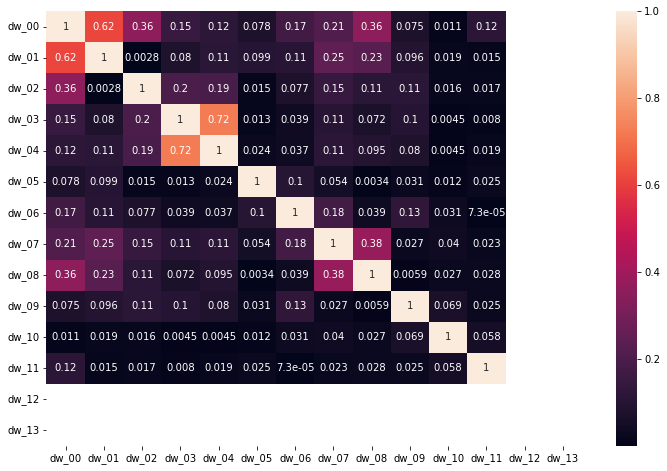

In [8]:
dw_cols = [cols for cols in X_train_copy.columns if cols.startswith('dw')]
corr = X_train_copy[dw_cols].corr()
plt.figure(figsize = (12, 8))
sns.heatmap(corr.abs(), annot = True)

In [7]:
#DW 12 and dw_13 do not have any values, hence we drop them.

#DW 01 and dw_02 seems to be highly correlated, also dw_03 and dw_04. Hence, we need to:
#1. Drop one of them.
#2. Get their sum and drop one column.
#The same case applies to dw_03 and dw_04


## PSA, stv, car, lln.
#These pairs of columns also have very high correlation.
#We can choose to:
#1. Find the sum of each pair as done in notebook 'Solution 2' and drop one.
#2. Drop one column.

![2.png](inputs/2.png)

<AxesSubplot:>

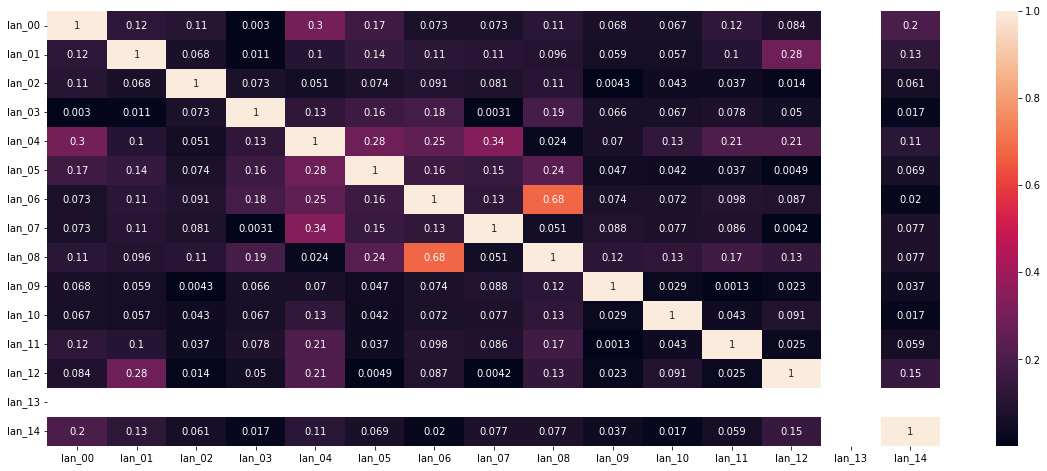

In [8]:
################################
#Language columns.
lan_cols = [cols for cols in X_train_copy.columns if cols.startswith('lan')]

corr = X_train_copy[lan_cols].corr()
plt.figure(figsize = (20, 8))
sns.heatmap(corr.abs(), annot = True)

# From the below plot, we can see that lan_08 and lan_06 are highly correlational.
# We can decide to :
# 1. Drop one column.
# 2. Find the sum of both columns and drop one.

# We also need to drop columns lan_13 as it has no values'

<AxesSubplot:>

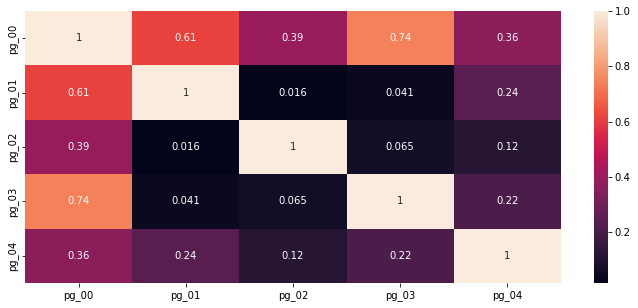

In [9]:
#########################
#PG columns. (Population group columns.)
pg_cols = [cols for cols in X_train_copy.columns if cols.startswith('pg')]

corr = X_train_copy[pg_cols].corr()
plt.figure(figsize = (12, 5))
sns.heatmap(corr.abs(), annot = True)
# From the below plot, we can see that pg_01 and pg_00 are highly correlational.
# We can decide to :
# 1. Drop one column.
# 2. Find the sum of both columns and drop one.

<AxesSubplot:>

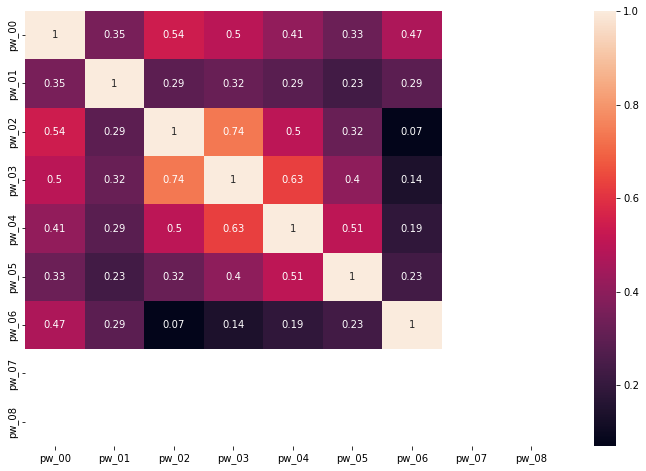

In [10]:
####################################
#PW Piped water columns.
pw_cols = [cols for cols in X_train_copy.columns if cols.startswith('pw')]

corr = X_train_copy[pw_cols].corr()
plt.figure(figsize = (12, 8))
sns.heatmap(corr.abs(), annot = True)

# From the below plot, we can see that pw_02 and pw_03 are highly correlational.
# We can decide to :
# 1. Drop one column.
# 2. Find the sum of both columns and drop one.
#pw_07 and pw_08 have no values, hence we drop them.

![3.png](inputs/3.png)

<AxesSubplot:xlabel='lat', ylabel='lon'>

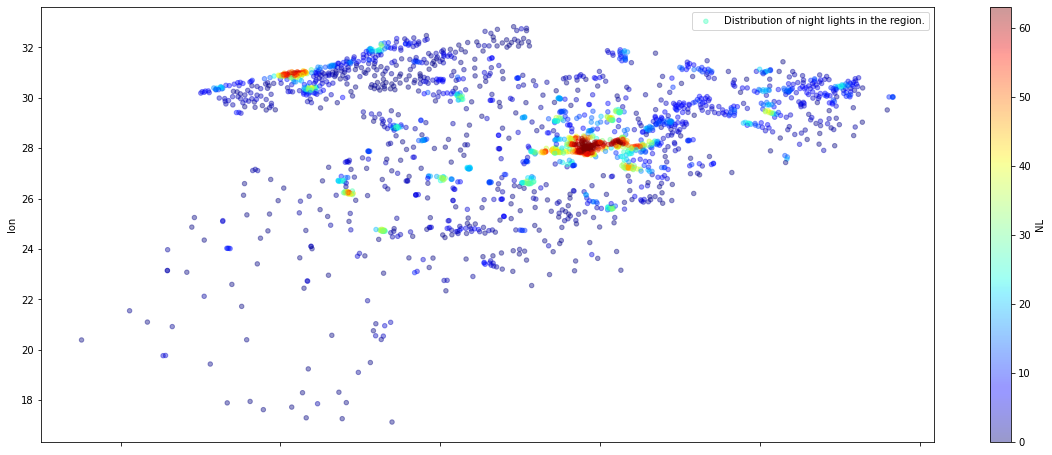

In [11]:
X_train_copy.plot(kind = 'scatter', x = 'lat', y = 'lon', alpha = 0.4,
           label = 'Distribution of night lights in the region.', c = 'NL',
           cmap = plt.get_cmap('jet'), colorbar = True, figsize = (20, 8))

<AxesSubplot:xlabel='target', ylabel='Count'>

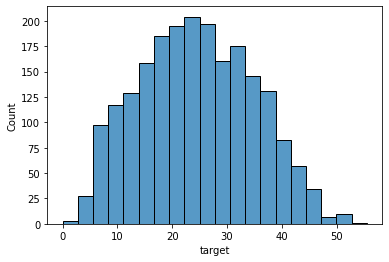

In [12]:
sns.histplot(y_train_copy, bins = 20)

<AxesSubplot:title={'center':'Distribution of ward categories across all wards'}, xlabel='ward_category'>

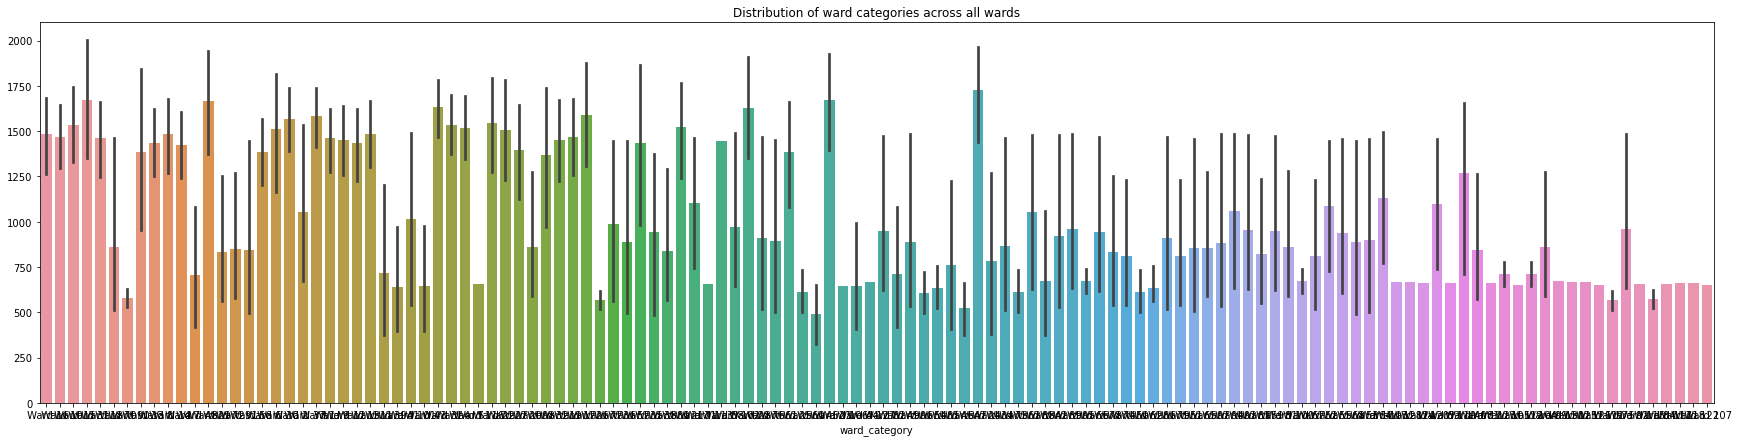

In [13]:
plt.figure(figsize = (30, 7))
plt.title('Distribution of ward categories across all wards')
sns.barplot(x = X_train_copy.ward_category, y = X_train_copy.index)

# 3. Prepare dataset.

In [63]:
#Make a copy of train set.
label_train = train.copy()
label_test = test.copy()

In [64]:
def create_code_category(data_frame):
    data_frame['Code_Category'] = data_frame['ADM4_PCODE'].str[:3]
    data_frame['Code_Category'] = data_frame['Code_Category'].map({
        'ZA5' : 'ZA5', 'ZA7' : 'ZA7', 'ZA9' : 'ZA9',
        'ZA6' : 'ZA6', 'ZA8' : 'ZA8', 'ZA4' : 'ZA4',
        'ZA3' : 'ZA3', 'ZA2' : 'ZA2', 'ZA1' : 'ZA1'})
    return data_frame

label_train = create_code_category(label_train)
label_test = create_code_category(label_test)

In [65]:
PATTERN = r'[\d\s]+:'

for dataset in (label_train, label_test):
    dataset['Ward_Category'] = dataset['ward'].str.replace(PATTERN, '', regex = True)
    
    # dataset['sum_lan_cols'] = dataset[lan_cols_sum].sum(axis = 1)
    
    dataset['sum_dw01_dw02'] = dataset['dw_01'] + dataset['dw_02']
    dataset['sum_dw03_dw04'] = dataset['dw_03'] + dataset['dw_04']
    dataset['ratio_individuals_households'] =  dataset['total_individuals'] / dataset['total_households']
    dataset['ratio_households_lgt'] = dataset['ratio_individuals_households'] * dataset['lgt_00']
    
    dataset['sum_pg02_to_04'] = dataset[pg_cols[2:]].sum(axis = 1)
    dataset['sum_pw03_pw07'] = dataset['pw_03'] + dataset['pw_07']
    dataset['sum_psa02_psa03'] = dataset['psa_02'] + dataset['psa_03']
    dataset['sum_pw02_pw03'] = dataset['pw_02'] + dataset['pw_03']

In [66]:
numerical_cols = [cols for cols in label_train.columns if label_train[cols].dtype in ['int', 'float']]
cat_cols = [cols for cols in label_train.columns if label_train[cols].dtype == 'object']

cat_cols

['ward', 'ADM4_PCODE', 'Code_Category', 'Ward_Category']

In [67]:
encoder = OrdinalEncoder(handle_unknown = 'error')
kmeans = KMeans(n_clusters = label_train['Code_Category'].nunique())
kmeans1 = KMeans(n_clusters = 8)

for dataset in (label_train, label_test):
    dataset[cat_cols] = encoder.fit_transform(dataset[cat_cols])
    
    dataset['Cluster'] = kmeans.fit_predict(dataset.loc[:, ['ADM4_PCODE']])
    dataset['Cluster'] = dataset['Cluster'].astype('category')
    
    dataset['Ward_Cluster'] = kmeans.fit_predict(dataset.loc[:, ['lon', 'lat', 'ward']])
    dataset['Ward_Cluster'] = dataset['Cluster'].astype('category')
    
    dataset['SplitBy'] = dataset['ward'].astype(int)
    dataset = dataset.sort_values('SplitBy').reset_index(drop = True)
    dataset = dataset.drop_duplicates('SplitBy').reset_index(drop = True)
    

<AxesSubplot:xlabel='lat', ylabel='lon'>

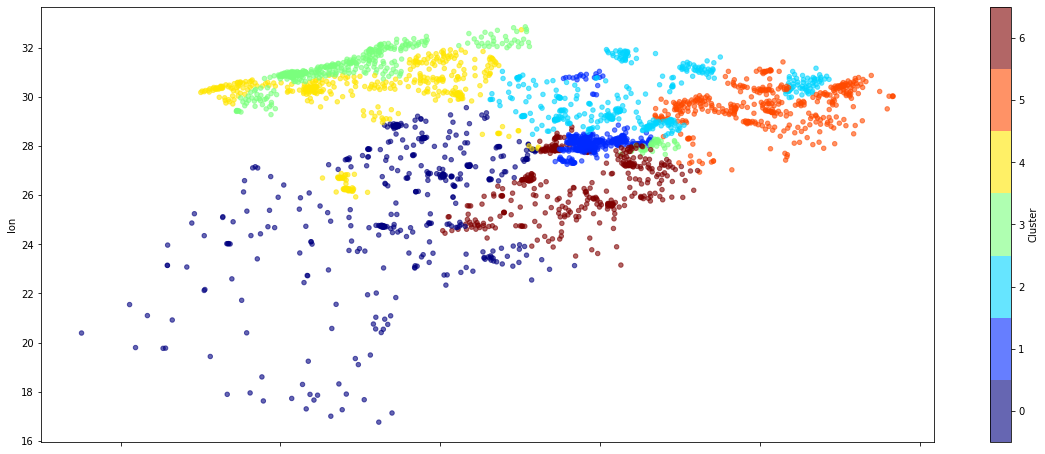

In [68]:
label_train.plot(kind = 'scatter', x = 'lat', y = 'lon', c = 'Cluster', alpha = 0.6,
                 cmap = plt.get_cmap('jet'), colorbar = True, figsize = (20, 8))

<AxesSubplot:xlabel='lat', ylabel='lon'>

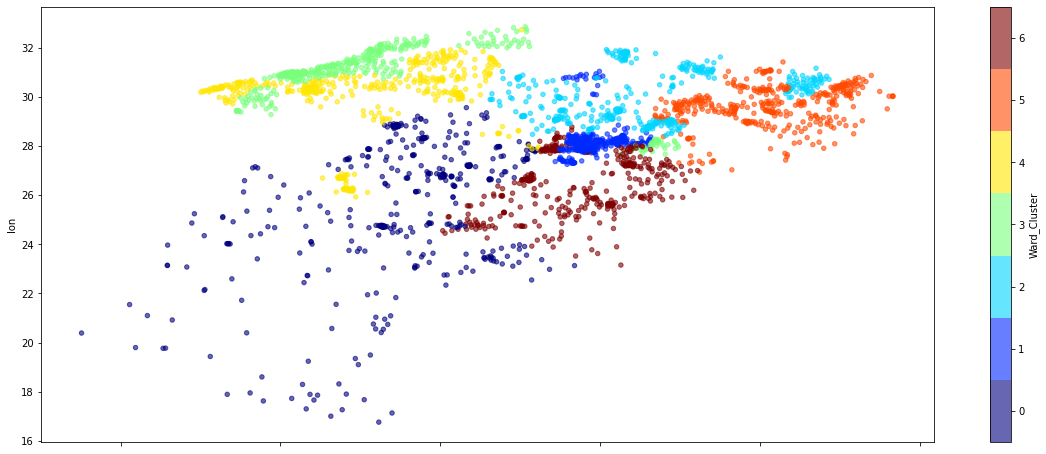

In [69]:
label_train.plot(kind = 'scatter', x = 'lat', y = 'lon', c = 'Ward_Cluster', alpha = 0.6,
                 cmap = plt.get_cmap('jet'), colorbar = True, figsize = (20, 8))

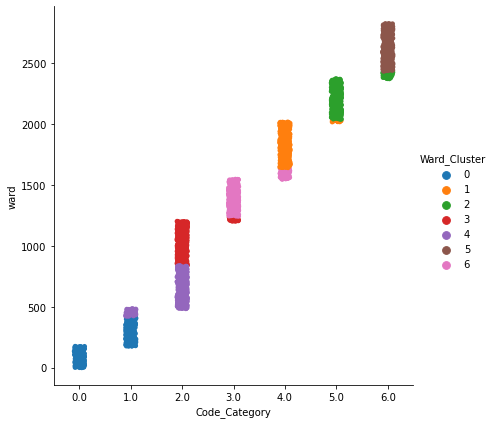

In [70]:
sns.catplot(x = 'Code_Category', y = 'ward', hue = 'Ward_Cluster', data = label_train, height = 6)

In [71]:
#Drop highlighted columns.

cols_to_drop = ['ADM4_PCODE', 'psa_01', 'stv_01', 'car_01', 'lln_01', 'dw_01', 'dw_03', 'ward', 'Code_Category',
                 'pg_02', 'pg_03', 'pg_04', 'pw_02', 'pw_07', 'pw_08', 'dw_13','lan_13',
                'lan_14', 'dw_12', 'psa_02', 'psa_03', 'pw_02', 'pw_03', 'SplitBy', 'ratio_individuals_households']

In [72]:
SEED = 42

X = label_train.drop('target', axis = 1)
X = X.drop(cols_to_drop, axis = 1)
y = label_train['target']

kf = GroupKFold(n_splits = 10)
kf.get_n_splits(X, y)


10

In [73]:
label_test = label_test.drop(cols_to_drop, axis = 1)

In [74]:
#Define model paramters.
class CFG:
    rf_params = {
    'criterion' : 'squared_error',
    'n_estimators': 200,
    'random_state': SEED,
    'n_jobs' : 6
    }

In [75]:
model_preds = []
rmse_metrics = []
groups = label_train['SplitBy']
fold = 0


for train_index, test_index in kf.split(X, y, groups):
    print(50 * '-')
    print(f'Fold {fold} / {kf.get_n_splits(X, y)}')
    fold += 1
    
    X_train, X_test = X.iloc[train_index,: ], X.iloc[test_index,: ]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model = RandomForestRegressor(**CFG.rf_params)
    estimator = model.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)
    print(f'Fold-{fold} MSE: , {mean_squared_error(y_test, y_pred)}, RMSE : {np.sqrt(mean_squared_error(y_test, y_pred))}')
    rmse_metrics.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    
    y_pred_test = estimator.predict(label_test)
    model_preds.append(y_pred_test)

--------------------------------------------------
Fold 0 / 10
Fold-1 MSE: , 14.323248794806823, RMSE : 3.7846068216932154
--------------------------------------------------
Fold 1 / 10
Fold-2 MSE: , 12.869651981013234, RMSE : 3.5874297179196746
--------------------------------------------------
Fold 2 / 10
Fold-3 MSE: , 10.071323626029294, RMSE : 3.173534878653344
--------------------------------------------------
Fold 3 / 10
Fold-4 MSE: , 9.381683129707024, RMSE : 3.0629533345624163
--------------------------------------------------
Fold 4 / 10
Fold-5 MSE: , 11.383335203638028, RMSE : 3.373919857322937
--------------------------------------------------
Fold 5 / 10
Fold-6 MSE: , 11.162995434353947, RMSE : 3.341106917528074
--------------------------------------------------
Fold 6 / 10
Fold-7 MSE: , 13.721392809423595, RMSE : 3.704239842319014
--------------------------------------------------
Fold 7 / 10
Fold-8 MSE: , 10.148527048615003, RMSE : 3.1856752892620745
---------------------

In [76]:
np.mean(rmse_metrics), np.std(rmse_metrics)

(3.4471466766349037, 0.24748545621286186)

In [31]:
np.mean(rmse_metrics), np.std(rmse_metrics)

(3.4409330156891413, 0.2523570365142203)

In [39]:
np.mean(rmse_metrics), np.std(rmse_metrics)

(3.4284631093734093, 0.24826434505066508)

In [70]:
#Mutual information.
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features = 'auto')
    mi_scores = pd.Series(mi_scores, name = 'MI_scores', index = X.columns)
    mi_scores = mi_scores.sort_values(ascending = False)
    return mi_scores


In [71]:
X = label_train.drop('target', axis = 1)
y = label_train.target
discrete_features = X.dtypes == float

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores

psa_00    0.538925
pw_00     0.520084
car_01    0.508647
car_00    0.508647
pg_00     0.503256
            ...   
pw_08     0.000000
pw_07     0.000000
lan_13    0.000000
dw_13     0.000000
dw_12     0.000000
Name: MI_scores, Length: 74, dtype: float64

In [72]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending = True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title('Mutual Information scores')

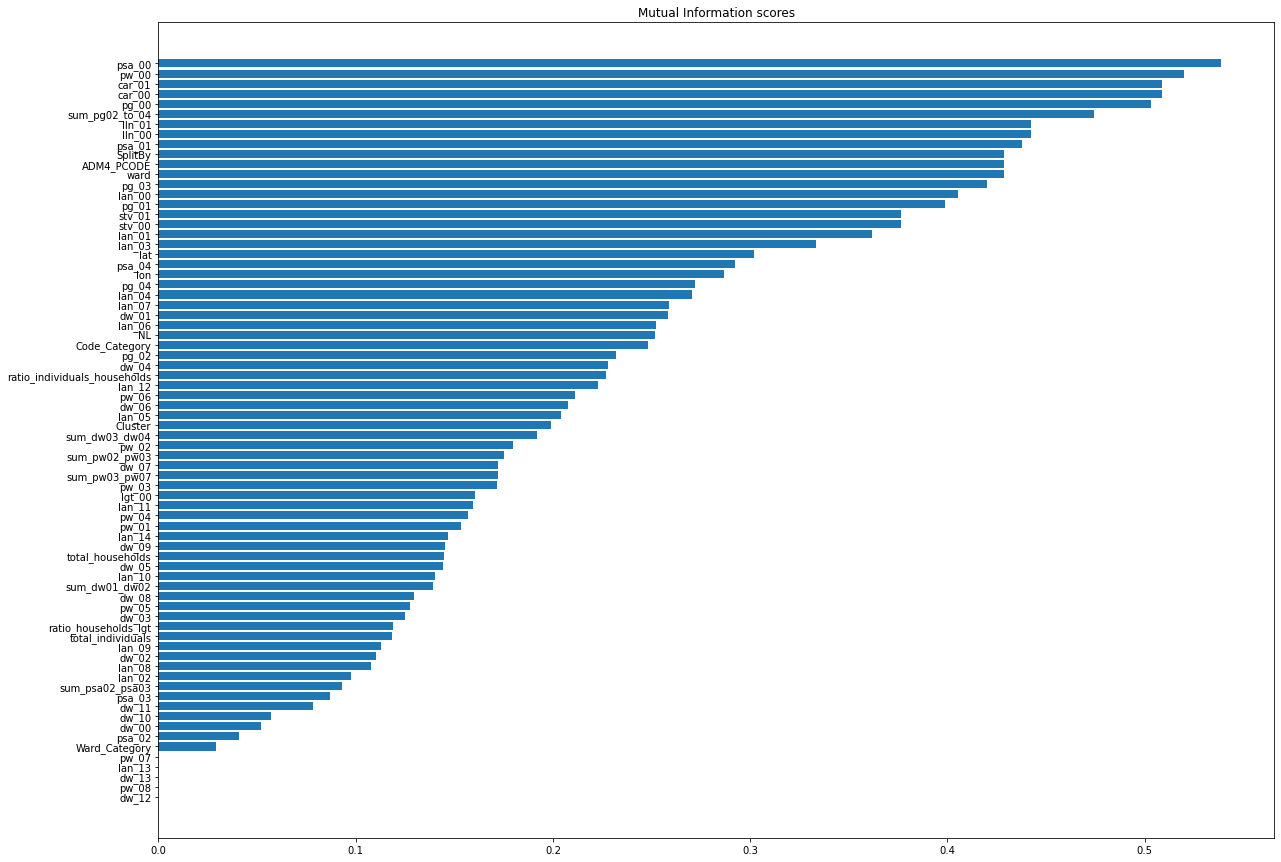

In [73]:
plt.figure(figsize = (20, 15))
plot_mi_scores(mi_scores)

In [77]:
SUB_FILE = ss.copy()
SUB_FILE['target'] = np.mean(model_preds, axis = 0)
SUB_FILE.to_csv('submissions/95th_submission.csv', index = False)

In [ ]:
# 11.212612211116268
# 10.029327835001089
# 15.528342266760339



In [42]:
predictions = gbr_model.predict(label_test)
sub_file = ss.copy()
sub_file['target'] = predictions
sub_file.to_csv('submissions/86th_submission.csv', index = False)

In [74]:
corr

,total_households,total_individuals,dw_00,dw_02,dw_04,dw_05,dw_06,dw_07,dw_08,dw_09,...,sum_of_stv_cols,sum_of_car_cols,sum_of_lln_cols,sum_of_psa_cols,sum_dw01_dw02,sum_dw03_dw04,sum_lan06_lan08,sum_pg00_pg01,sum_pw03_pw07,sum_pw07_pw08
total_households,1.000000,0.959388,-0.232181,0.214707,0.312889,0.108448,0.276775,0.270379,0.250818,0.119115,...,NaN,NaN,NaN,0.003555,-0.123709,0.347239,-0.037521,-0.247536,-0.135843,NaN
total_individuals,0.959388,1.000000,-0.210284,0.176749,0.242644,0.129398,0.251326,0.210297,0.196891,0.073114,...,NaN,NaN,NaN,0.001269,-0.076568,0.270345,-0.072301,-0.183108,-0.122582,NaN
dw_00,-0.232181,-0.210284,1.000000,-0.355951,-0.119924,-0.077964,-0.172828,-0.208345,-0.359165,-0.074842,...,NaN,NaN,NaN,-0.024084,-0.705916,-0.141054,0.086912,0.014573,-0.108364,NaN
dw_02,0.214707,0.176749,-0.355951,1.000000,0.192793,0.015177,0.076796,-0.146975,-0.109666,0.110815,...,NaN,NaN,NaN,0.005050,0.407465,0.209192,-0.106998,-0.281103,-0.122886,NaN
dw_04,0.312889,0.242644,-0.119924,0.192793,1.000000,0.024123,0.036827,-0.114957,-0.094641,0.079560,...,NaN,NaN,NaN,0.004477,-0.024251,0.959803,-0.074282,-0.614885,-0.152966,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sum_dw03_dw04,0.347239,0.270345,-0.141054,0.209192,0.959803,0.021227,0.040468,-0.119491,-0.092162,0.094242,...,NaN,NaN,NaN,0.000281,-0.013065,1.000000,-0.087584,-0.627787,-0.153231,NaN
sum_lan06_lan08,-0.037521,-0.072301,0.086912,-0.106998,-0.074282,-0.006749,0.014798,0.257375,0.128120,-0.074243,...,NaN,NaN,NaN,-0.015392,-0.207538,-0.087584,1.000000,0.099004,-0.195387,NaN
sum_pg00_pg01,-0.247536,-0.183108,0.014573,-0.281103,-0.614885,-0.090756,-0.044160,0.159325,0.080997,-0.168289,...,NaN,NaN,NaN,-0.012075,0.074565,-0.627787,0.099004,1.000000,0.230258,NaN
sum_pw03_pw07,-0.135843,-0.122582,-0.108364,-0.122886,-0.152966,-0.111576,-0.185433,-0.097096,0.065369,-0.111377,...,NaN,NaN,NaN,-0.001959,0.202080,-0.153231,-0.195387,0.230258,1.000000,NaN
